![title](img/boston.png)

## Boston Housing Price Prediction
Ziel: Regressionsmodel der Hauspreise in Boston 

### Schritt 1:  Data Collection
- Bibliotheken importieren  
- Datensätze aus Sklearn.datasets

In [117]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import time


In [118]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
 
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [119]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Schritt 2: Data Preprocessing
- Welche Features gibt es?
- Sind die Daten vollständig?

In [120]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [121]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [122]:
#Der Preis des Hauses, welches durch die Variable MEDV angegeben ist, ist die Zielvariable.
#Ich erstelle eine neue Spalte mit Zielvariable und füge sie dem Datenrahmen hinzu.

df ['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Schritt 3: Data Exploration
- einige Visualisierungen, um die Beziehung zwischen Variablen zu verstehen.

In [123]:
#Überprüfung des Datentyps jeder Spalte mit dtypes, um sicherzustellen, dass jede Spalte einen numerischen Datentyp hat.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [124]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


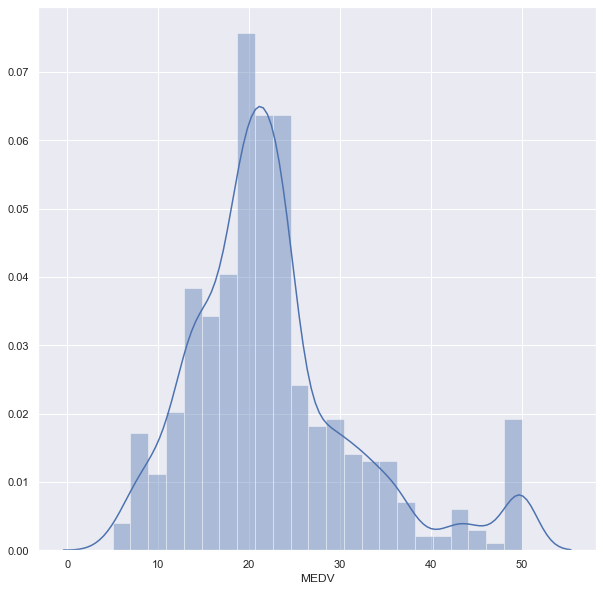

In [125]:
sb.set (rc={'figure.figsize' :(10,10)})
sb.distplot(df['MEDV'])
plt.show()

> Die Werte von MEDV sind eine Normaldistribution mit wenigen verstreuten Ausreißern.

<Figure size 1800x1080 with 0 Axes>

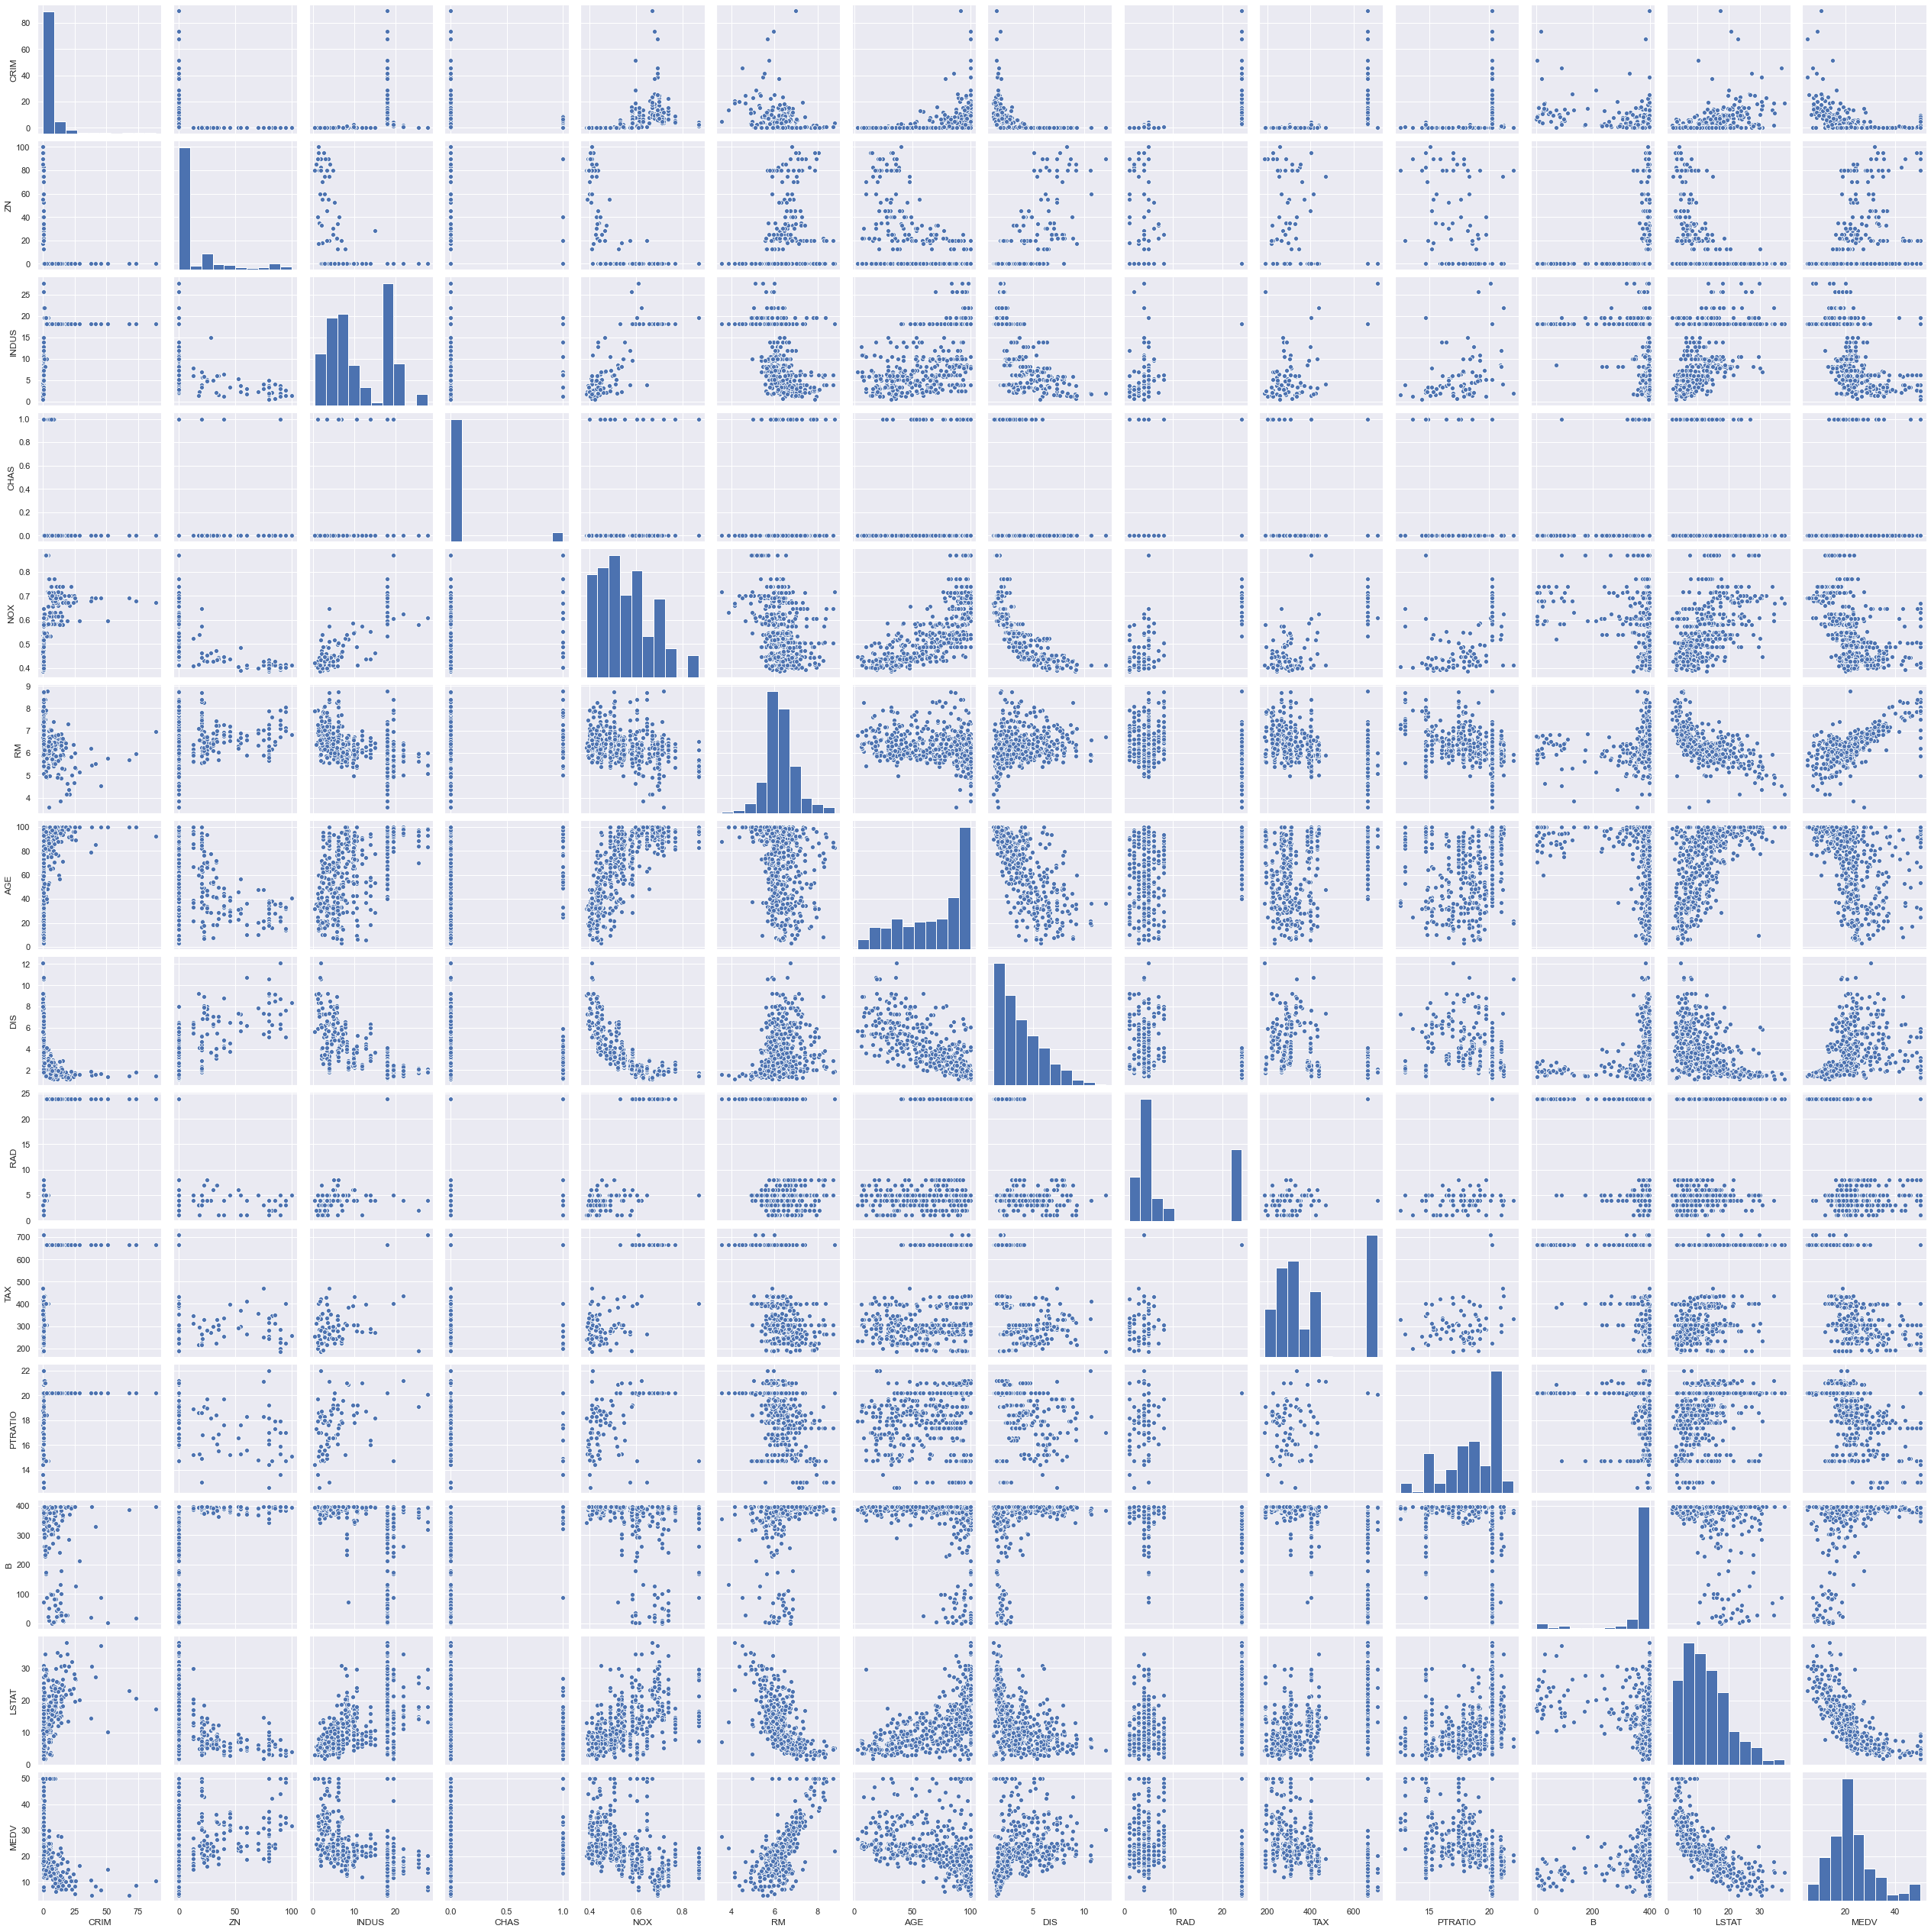

In [126]:
boston_sample = df.sample(506)

#Pairplot erstellen
plt.figure(figsize=(25,15))
sb.pairplot(data=boston_sample)

- Viel Struktur in diesem Datensatz mit Ausreißern und unterschiedlichen Datenverteilungen, und Daten sind nicht standardisiert und normalisiert. <br/>

- Beziehungen zwischen Variablen:

> RM und MEDV haben die gleiche Form wie in einer Normalverteilung.

> AGE ist nach links und LSTAT nach rechts geneigt. <br/>

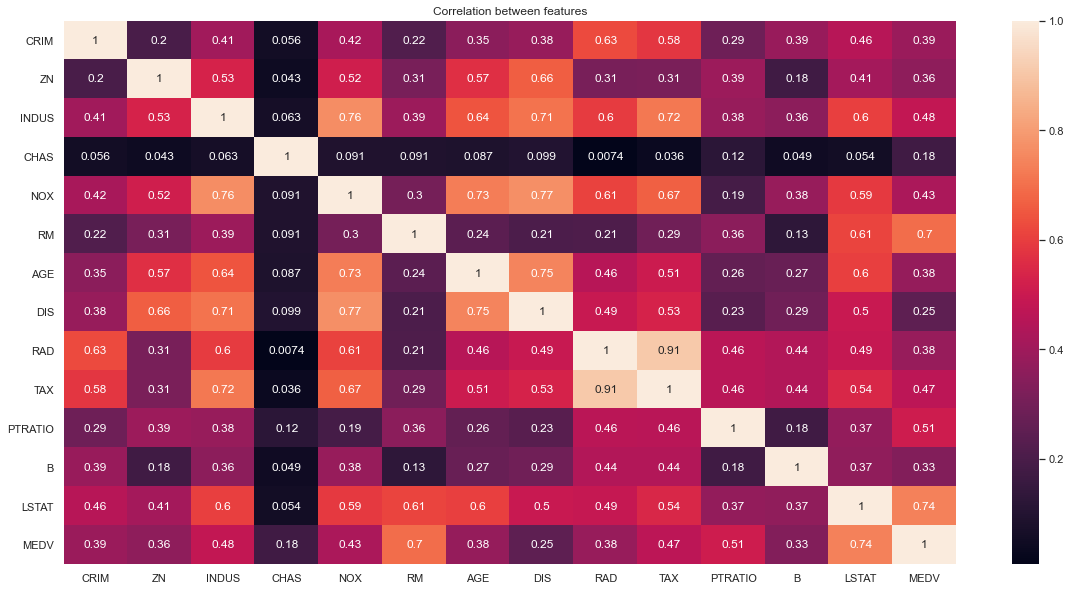

In [128]:
#Eine Korrelationsmatrix, die die linearen Beziehungen zwischen den Variablen misst wird erstellt
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr().abs(),  annot=True)
plt.title('Correlation between features');

> Aus der Heatmap geht hervor, dass TAX und RAD stark korrelierte Merkmale sind. Die Spalten LSTAT, RM, und PTRAIO weisen einen Korrelationswert über 0,5 mit MEDV auf, was ein guter Hinweis auf die Verwendung als Prädiktoren ist. 

### Schritt 4: Data Preparation
- Normalisieren der Daten  
- Die folgenden Visualisierungen werden verwendet, um die Beziehung der Zielvariable 'MEDV' zu anderen Funktionen zu verstehen.

In [130]:
#Daten zwischen 0 und 1 normalisieren
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(df)
scaled = scaler.transform(df)
boston = pd.DataFrame(scaled, columns = df.columns)

In [131]:
X_selection = boston.drop(columns = ['MEDV'])
y_selection = boston['MEDV']

print('Aktuell gibt es {} Features'.format(X_selection.shape[1]))

Aktuell gibt es 13 Features


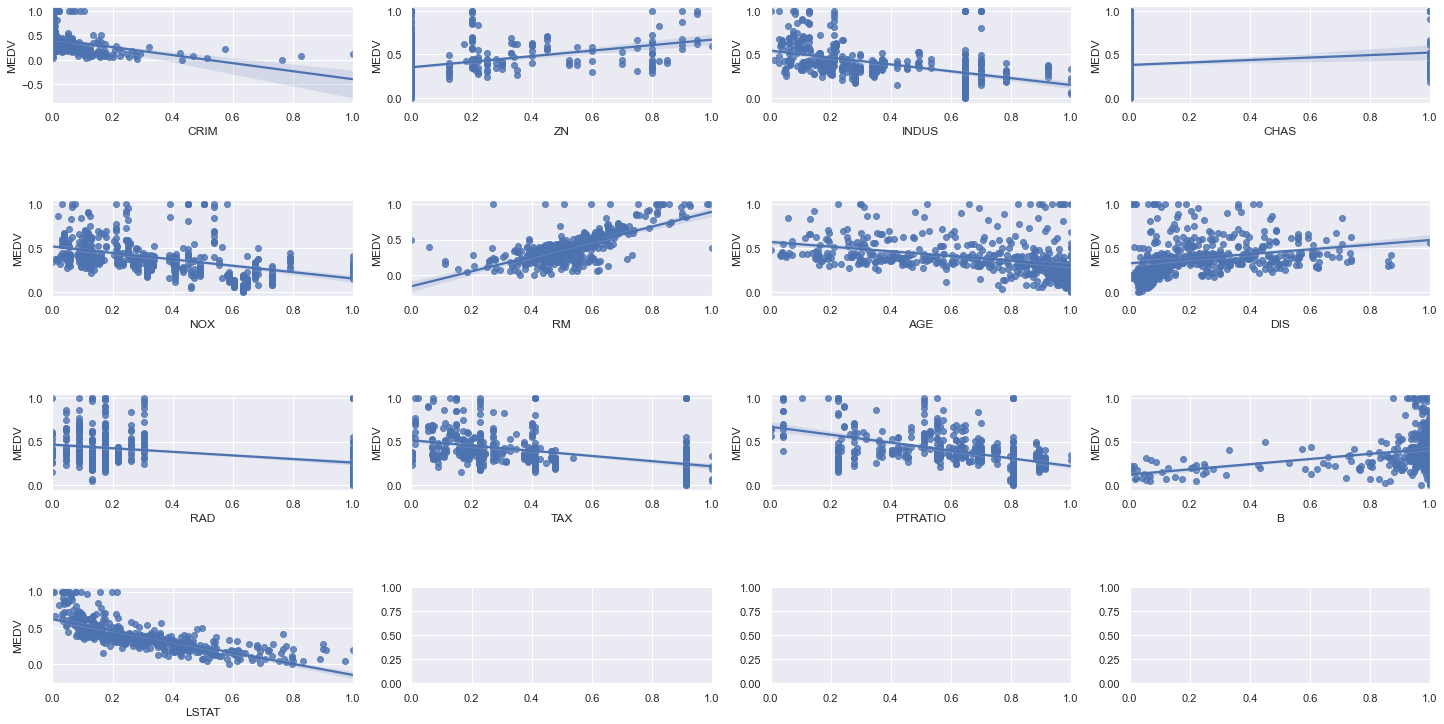

In [132]:
x = X_selection
y = y_selection

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(x):
    sb.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

> MEDV steigt linear mit dem RM an. Dies ist sinnvoll, da wir erwarten würden, dass der Durchschnittspreis eines Hauses mit zunehmender Anzahl der Zimmer im Allgemeinen teurer wird. <br/>
> MEDV nimmt linear mit LSTAT ab. Dies ist auch sinnvoll, da wir davon ausgehen können, dass der Durchschnittspreis eines Hauses an Orten mit niedrigerem Status im Allgemeinen günstiger ist.

>Gerade weil es nur wenige Features gibt, wähle ich alle Features aus.

### Schritt 5: Train- / Testsplit
- 70% Trainingsdaten, 30% Testdaten

In [133]:
# Aufteilung der Daten in 70% Trainings- & 30% Test-Daten
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.3, random_state =42)
print("{}\t Trainingsdaten, \n{}\t Testdaten, \n{}\t Features".format(x_train.shape[0], x_test.shape[0], x_test.shape[1]))
# Success
print("Training and testing split was successful.")

354	 Trainingsdaten, 
152	 Testdaten, 
13	 Features
Training and testing split was successful.


### Schritt 6: Model Developments
- Folgende Modelle zum Testen ausgewählt
> Decision Tree  
Random Forest  
k-Nearest-Neighbour  
Support Vector Machine  
Linear Regression (OLS & SGD)    
Polynomial Regression 

- Hyperparameteroptimierung bei Modellen mit optimierbaren Parametern
> teilweise Grid-Search, teilweise Randomized Search
- Bewertungsmetrik: Bestimmtheitsmaß $R^2$ 
- Vorhersage von Testdaten mit dem Modell


### Decision Tree Regressor
- Fitting Model mit Hyperparameteroptimierung: GridSearchCV mit 5-Folding
- Bestimmung der am besten optimierten Hyperparameter
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [176]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

param_list = {"max_depth": [2, 6, 8], "min_samples_split": [10, 20, 40], "min_samples_leaf": [20, 40, 100], "max_leaf_nodes": [5, 20, 100], "criterion": ["mse", "friedman_mse", "mae"]}
dtr= DecisionTreeRegressor(random_state=0)
dtr_rs = RandomizedSearchCV(dtr, param_list, cv=5)
dtr_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [2, 6, 8],
                                        'max_leaf_nodes': [5, 20, 100],
                                        'min_samples_leaf': [20, 40, 100],
                                        'min_samples_split': [10, 20, 40]})

In [177]:
#Bestimmung der am besten optimierten Hyperparameter
print("Tuned Decision Tree Regressor Parameters:" , dtr_rs.best_params_)
dtr_best = dtr_rs.best_estimator_
dtr_train_score=dtr_best.score(x_train, y_train)

#Ausrechnen des Bestimmtheitsmaßes $R^2$
print("R^2 score (Train): {}" .format (dtr_train_score))

dtr_score = dtr_best.score(x_test, y_test)
print("R^2 score (Test): {}" .format (dtr_score))

#Vorhersage von Testdaten mit dem Modell
dtr_y_pred = dtr_best.predict(x_test)

Tuned Decision Tree Regressor Parameters: {'min_samples_split': 40, 'min_samples_leaf': 20, 'max_leaf_nodes': 100, 'max_depth': 8, 'criterion': 'friedman_mse'}
R^2 score (Train): 0.8042962988034926
R^2 score (Test): 0.7372099970752845


### Random Forest
- Fitting Model mit Hyperparameteroptimierung: RandomizedSearchCV mit 5-Folding
- Bestimmung der am besten optimierten Hyperparameter
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [156]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = np.arange(1,100)
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_random= {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfr = RandomForestRegressor()

rfr_rs= RandomizedSearchCV(rfr, param_random, n_iter = 20, cv = 5, verbose=2, random_state=0, n_jobs = 4)
rfr_rs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.5, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   random_state=0, verbose=2)

In [157]:
#Bestimmung der am besten optimierten Hyperparameter
print("Tuned Random Forest Parameters:", rfr_rs.best_params_)
rfr_best = rfr_rs.best_estimator_


#Ausrechnen des Bestimmtheitsmaßes $R^2$
rfr_train_score=rfr_best.score(x_train, y_train)
print("R^2 score (Train): {}" .format (rfr_train_score))

rfr_score = rfr_best.score(x_test, y_test)
print("R^2 score (Test): {}" .format (rfr_score))

#Vorhersage von Testdaten mit dem Modell
rfr_y_pred = rfr_best.predict(x_test)

Tuned Random Forest Parameters: {'n_estimators': 60, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
R^2 score (Train): 0.9867031443348689
R^2 score (Test): 0.8657197906776098


### k-Nearest-Neighbor
- Fitting Model mit Hyperparameteroptimierung: RandomizedSearchCV mit 5-Folding
- Bestimmung der am besten optimierten Hyperparameter
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [163]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

params_knn = {'n_neighbors': np.arange(1, 100)}

knn_rs = RandomizedSearchCV(knn, params_knn, cv=5, random_state=0, n_iter=20, verbose=1, n_jobs=4)

knn_rs.fit(x_train, y_train)

knn = KNeighborsRegressor()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [165]:
#Bestimmung der am besten optimierten Hyperparameter
print("Tuned k-Nearest-Neighbors: ", knn_rs.best_params_)
knn_best = knn_rs.best_estimator_

#Ausrechnen des Bestimmtheitsmaßes $R^2$
knn_train_score=knn_best.score(x_train, y_train)
print("R^2 score (Train): {}" .format (knn_train_score))

knn_score = knn_best.score(x_test, y_test)
print("R^2 score(Test): {}" .format (knn_score))

#Vorhersage von Testdaten mit dem Modell
knn_y_pred = knn_best.predict(x_test)

#'weights':['uniform', 'distance']

Tuned k-Nearest-Neighbors:  {'n_neighbors': 3}
R^2 score (Train): 0.885496429919268
R^2 score(Test): 0.7397442247902637


### Support Vector Machine
- Fitting Model mit Hyperparameteroptimierung: GridSearch mit 5-Folding
> samplen von 10% der Daten, drastisch steigender Rechenaufwand mit Samplemenge

- Bestimmung der am besten optimierten Hyperparameter
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [166]:
from sklearn.svm import SVR

svr = SVR(gamma='scale')

params_svr = {'kernel':  ['linear', 'poly', 'rbf', 'sigmoid']}

svr_gs = GridSearchCV(svr, params_svr, cv=5, verbose=1, n_jobs=4)

svr_gs.fit(x_train.sample(x_train.shape[0]//10, random_state=0), y_train.sample(y_train.shape[0]//10, random_state=0))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [167]:
#Bestimmung der am besten optimierten Hyperparameter
print("Tuned SVM Parameters:", svr_gs.best_params_)
svr_best = svr_gs.best_estimator_

#Ausrechnen des Bestimmtheitsmaßes $R^2$
svr_train_score=svr_best.score(x_train, y_train)
print("R^2 score (Train): {}" .format (svr_train_score))
svr_score = svr_best.score(x_test, y_test)
print("R^2 score(Test): {}" .format (svr_score))

#Vorhersage von Testdaten mit dem Modell
svr_y_pred = svr_best.predict(x_test)

Tuned SVM Parameters: {'kernel': 'linear'}
R^2 score (Train): 0.6373635492747068
R^2 score(Test): 0.6242019465432164


### Linear Regression (OLS)
- Fitting Model mit keine Hyperparameteroptimierung und kein k-Folding
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [168]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [169]:
#Ausrechnen des Bestimmtheitsmaßes $R^2$
reg_train_score=reg.score(x_train, y_train)
print("R^2 score (Train): {}" .format (reg_train_score))

reg_score = reg.score(x_test, y_test)
print("R^2 score(Test): {}" .format (reg_score))

#Vorhersage von Testdaten mit dem Modell
ols_y_pred = reg.predict(x_test)

R^2 score (Train): 0.7434997532004697
R^2 score(Test): 0.7112260057484925


### Linear Regression (Stochastic Gradient Descend)
- Adaptive Learning Rate, initial: lr=0.01
- Fitting Model mit keine Hyperparameteroptimierung und kein k-Folding
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [170]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(learning_rate='adaptive', random_state=0, max_iter=50, tol=1e-3)
sgdr.fit(x_train, y_train)

SGDRegressor(learning_rate='adaptive', max_iter=50, random_state=0)

In [171]:
#Ausrechnen des Bestimmtheitsmaßes $R^2$
sgdr_train_score=sgdr.score(x_train, y_train)
print("R^2 score (Train): {}" .format (sgdr_train_score))

sgdr_score = sgdr.score(x_test, y_test)
print("R^2 score(Test): {}" .format (sgdr_score))

#Vorhersage von Testdaten mit dem Modell
sgdr_y_pred = sgdr.predict(x_test)

R^2 score (Train): 0.6867713560573891
R^2 score(Test): 0.6467959636025155


### Polynomial Regression
- Fitting Model mit keine Hyperparameteroptimierung und kein k-Folding
- Ausrechnen des Bestimmtheitsmaßes $R^2$
- Vorhersage von Testdaten mit dem Modell

In [172]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
polyRegressor = PolynomialFeatures()
x_train_poly = polyRegressor.fit_transform(x_train)
poly = lr()
poly.fit(x_train_poly, y_train)

LinearRegression()

In [173]:
#Ausrechnen des Bestimmtheitsmaßes $R^2$
poly_train_score=poly.score(x_train_poly, y_train)
print("R^2 score (Train): {}" .format (poly_train_score))
x_test_poly = polyRegressor.fit_transform(x_test)
poly_score = poly.score (x_test_poly, y_test)
print("R^2 score (Test): {}" .format (poly_score))

#Vorhersage von Testdaten mit dem Modell
poly_y_pred = poly.predict(x_test_poly)

R^2 score (Train): 0.9469794920108195
R^2 score (Test): 0.6610321968877106


### Schritt 7: Model Evaluation
- Ranking nach $R^2$-Score
- Beziehung zwichen Preis und vorhergesagtem Preis für alle Modelle
- Ranked Estimator zwischen Price und Predicted Price für alle Modelle

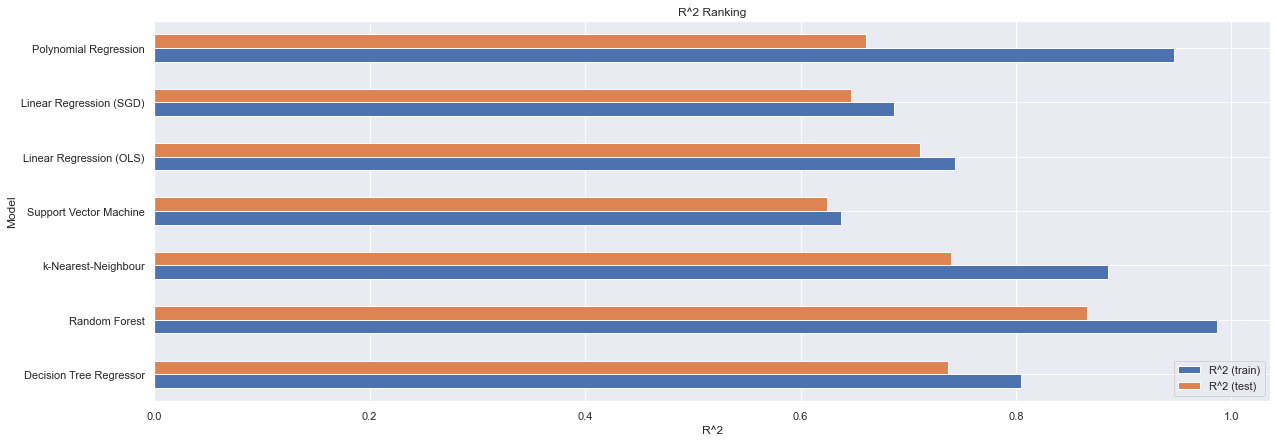

In [178]:
#Ausrechnen des Bestimmtheitsmaßes $R^2$
model_performance = pd.DataFrame({'Model': ['Decision Tree Regressor', 
                                            'Random Forest',
                                            'k-Nearest-Neighbour',
                                            'Support Vector Machine',
                                            'Linear Regression (OLS)',
                                            'Linear Regression (SGD)', 'Polynomial Regression'],
                                            'R^2 (train)': [dtr_train_score,
                                                    rfr_train_score,
                                                    knn_train_score,
                                                    svr_train_score,
                                                    reg_train_score,
                                                    sgdr_train_score, poly_train_score],
                                            'R^2 (test)': [dtr_score,
                                                    rfr_score,
                                                    knn_score,
                                                    svr_score,
                                                    reg_score,
                                                    sgdr_score, poly_score]})

model_performance.plot(kind='barh', figsize=(20,7))
plt.yticks([0, 1, 2, 3, 4, 5, 6], model_performance['Model'])
plt.title('R^2 Ranking')                  
plt.xlabel('R^2')                                        
plt.ylabel('Model')
plt.show()

> Random Forest weist sowohl im Trainingsdatensatz als auch im Testdatensatz ähnlich hohe Punktzahlen auf.  

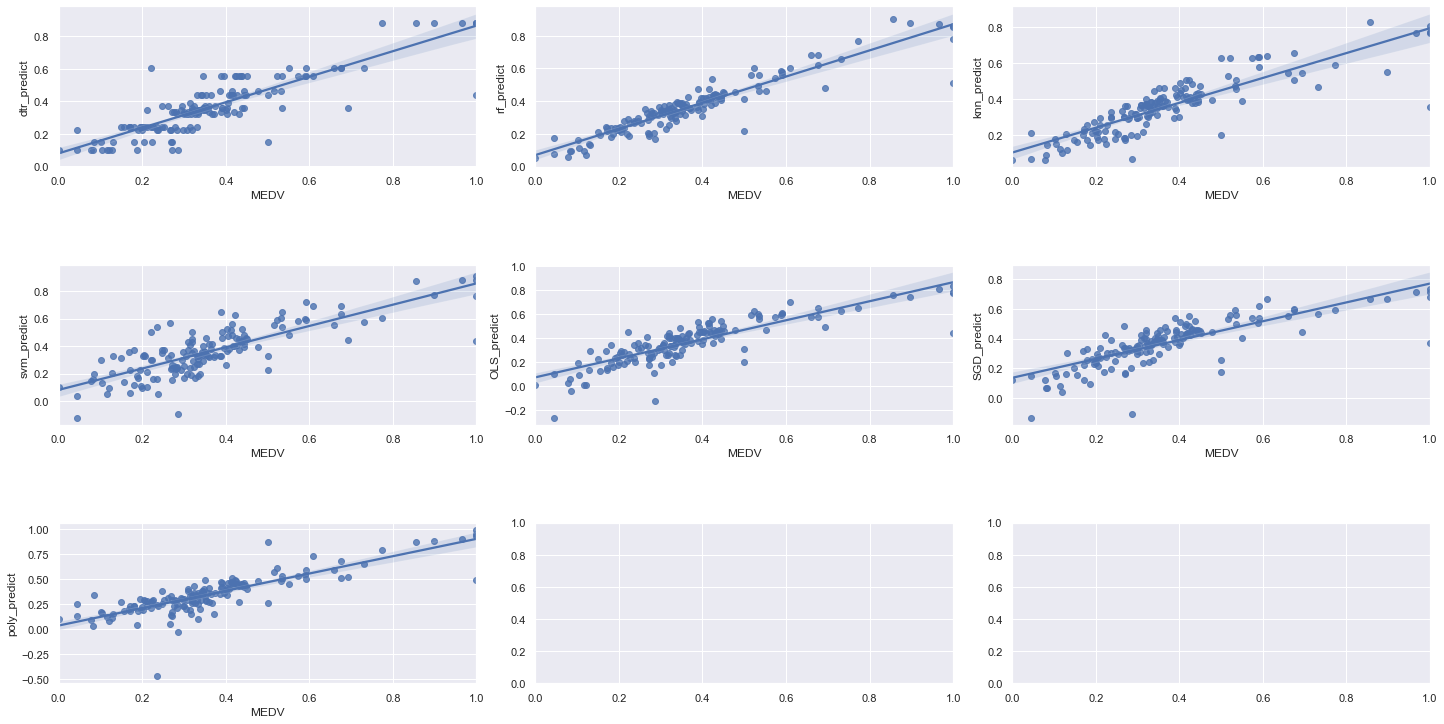

In [180]:
#plotting the y_test vs y_pred von jedem Modell. Idealerweise sollte es eine gerade Linie sein.
price = y_test
predicted_data = { 'dtr_predict': dtr_y_pred, 
                           'rf_predict': rfr_y_pred,
                           'knn_predict': knn_y_pred,
                           'svm_predict': svr_y_pred,
                           'OLS_predict': ols_y_pred,
                           'SGD_predict': sgdr_y_pred, 
                           'poly_predict': poly_y_pred}
predicted_data_df= pd.DataFrame(predicted_data, columns=['dtr_predict','rf_predict', 'knn_predict', 'svm_predict', 'OLS_predict',
                                                                                'SGD_predict', 'poly_predict'])
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(predicted_data_df):
    sb.regplot(x=price, y=predicted_data_df[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

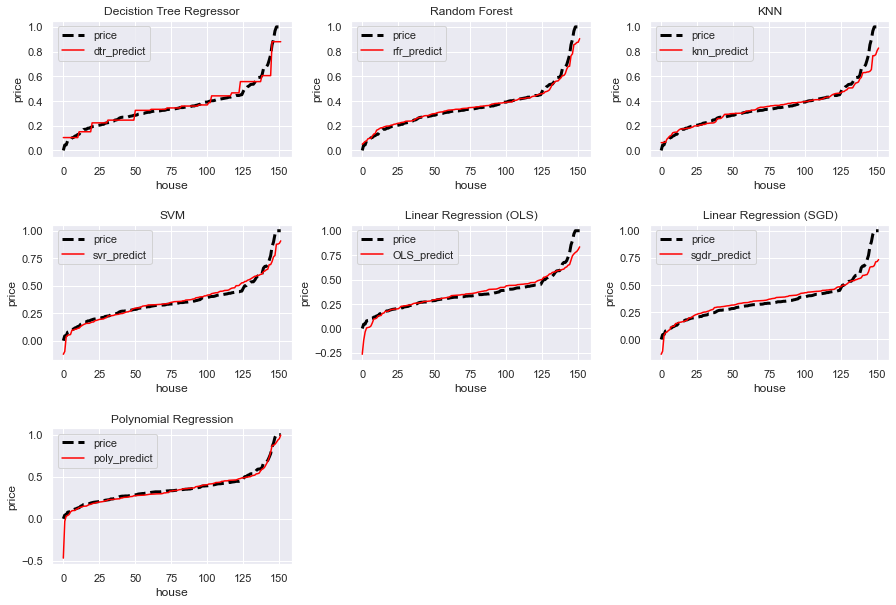

In [179]:
#visualisieren die Vorhersagen und die ursprünglichen Ziele Y_test, um zu überprüfen, welches Modell die beste Vorhersage hat.

x_figure = range(len(x_test))
fig = plt.figure(figsize = (15, 10))

ax1 = fig.add_subplot(331)  
ax1.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax1.plot(x_figure, sorted(dtr_y_pred), color = 'red', label="dtr_predict")
ax1.set_title('Decistion Tree Regressor')
ax1.set_xlabel('house')
ax1.set_ylabel('price')
ax1.legend()

ax2 = fig.add_subplot(332)  
ax2.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax2.plot(x_figure, sorted(rfr_y_pred),color = 'red', label="rfr_predict")
ax2.set_title('Random Forest')
ax2.set_xlabel('house')
ax2.set_ylabel('price')
ax2.legend()

ax3 = fig.add_subplot(333)  
ax3.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax3.plot(x_figure, sorted(knn_y_pred),color = 'red', label="knn_predict")
ax3.set_title('KNN')
ax3.set_xlabel('house')
ax3.set_ylabel('price')
ax3.legend()

ax4 = fig.add_subplot(334)  
ax4.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax4.plot(x_figure, sorted(svr_y_pred),color = 'red', label="svr_predict")
ax4.set_title('SVM')
ax4.set_xlabel('house')
ax4.set_ylabel('price')
ax4.legend()

ax5 = fig.add_subplot(335)  
ax5.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax5.plot(x_figure, sorted(ols_y_pred),color = 'red', label="OLS_predict")
ax5.set_title('Linear Regression (OLS)')
ax5.set_xlabel('house')
ax5.set_ylabel('price')
ax5.legend()

ax6 = fig.add_subplot(336)  
ax6.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax6.plot(x_figure, sorted(sgdr_y_pred),color = 'red', label="sgdr_predict")
ax6.set_title('Linear Regression (SGD)')
ax6.set_xlabel('house')
ax6.set_ylabel('price')
ax6.legend()

ax7 = fig.add_subplot(337)  
ax7.plot(x_figure, sorted(y_test), color = 'black', linewidth = 3,  linestyle="--",label="price")
ax7.plot(x_figure, sorted(poly_y_pred),color = 'red', label="poly_predict")
ax7.set_title('Polynomial Regression')
ax7.set_xlabel('house')
ax7.set_ylabel('price')
ax7.legend()

plt.subplots_adjust(wspace =0.25, hspace =0.5)
plt.show()

> In Bezug auf die Preisvorhersage sehen Decision Tree Model und Random Forest gut aus.

> Zusammenfassend lässt sich sagen, dass Random Forest für diesen Datensatz alle anderen Regressionsmodelle übertrifft.

### Extra: Feature Importance
- Da der Random Forest alle anderen Regressionsmodelle übertrifft, möchte ich weiter die relativen Merkmale im Datensatz unseres besten Modells Random Forest bestimmen, um das Model später zu verbessern.

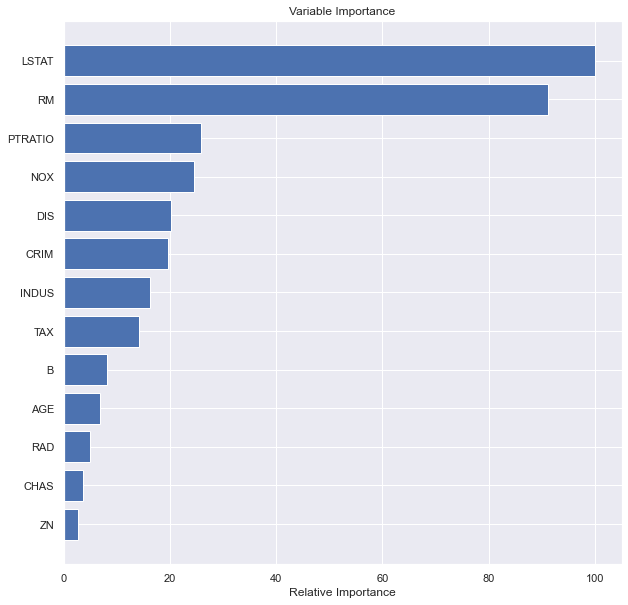

In [181]:
# plot model's feature importance
feature_importance = rfr_best.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston_dataset.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.clf()
plt.close()

> Die wichtigsten Merkmale bei der Vorhersage des MDEV sind LSTAT und RM. Es sei daran erinnert, dass diese beiden Variablen zuvor in hohem Maße mit dem MDEV korreliert waren.

### Schritt 9: Kritische Betrachtung
- Die in den Daten enthaltenen Merkmale reichen nicht aus, um ein Haus einzuschätzen. Es gibt nur zwei Merkmale, die stark mit MEDV korrelieren. Wir können weitere Funktionen wie ÖPNV-Verfügbarkeit, Vorhandensein eines Pools oder nicht und mehr hinzufügen.
- Diese Daten wurden vor vielen Jahren gesammelt und viele Dinge haben sich seitdem geändert, so dass es möglicherweise nicht möglich ist, dieses Modell für aktuelle Immobilienpreisvorhersagen von Boston zu implementieren.